## Optimal number of clusters: Elbow vs Silhouette (BaskinRobbins dataset)
* Baskin Robbins nutritional information from http://www.baskinrobbins.ca/nutritional-information/

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---

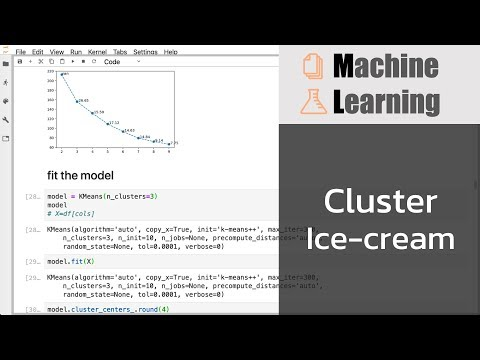

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('2xEPsZAxIGs', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.0.3
numpy   version = 1.18.1
seaborn version = 0.10.0


In [4]:
pd.Timestamp.now()

Timestamp('2020-04-22 13:27:12.883570')

In [5]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.csv')
df.sample(5)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
34,Mango Tango,230,10.0,0.4,29,24,4.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0
22,French Vanilla,180,10.0,0.3,16,16,3.0
19,Cookies ‘n Cream,270,17.0,0.4,25,18,5.0
10,Chocoholic’s Resolution,190,11.0,0.2,22,17,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


# Scikit-learn: KMeans Clustering
1. scale data
1. find optinum number of clusters
    1. Elbow method
    1. Silhouette analysis

In [7]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

## 1. scale data (z-score or power transform)

In [8]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [9]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
## z-score
scaler = preprocessing.StandardScaler() # create StandardScaler instance
z=scaler.fit_transform(df[cols]) # calc z-score
z[:5].round(4) # 2D numpy array

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])

In [10]:
## Yeo-Johnson transformation (preferable)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) # support only positive value
mat = pt.fit_transform(df[cols])
mat[:5].round(4)

array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

In [11]:
z_cols = [f'z_{c}' for c in cols]
z_cols

['z_Calories',
 'z_Total Fat (g)',
 'z_Trans Fat (g)',
 'z_Carbohydrates (g)',
 'z_Sugars (g)',
 'z_Protein (g)']

In [12]:
pt_cols = [f'pt_{c}' for c in cols]
pt_cols

['pt_Calories',
 'pt_Total Fat (g)',
 'pt_Trans Fat (g)',
 'pt_Carbohydrates (g)',
 'pt_Sugars (g)',
 'pt_Protein (g)']

In [13]:
ds=pd.concat([df, pd.DataFrame(mat, columns=pt_cols), pd.DataFrame(z, columns=z_cols)], axis='columns')
ds.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),pt_Calories,pt_Total Fat (g),pt_Trans Fat (g),pt_Carbohydrates (g),pt_Sugars (g),pt_Protein (g),z_Calories,z_Total Fat (g),z_Trans Fat (g),z_Carbohydrates (g),z_Sugars (g),z_Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,-0.518194,-0.324811,-0.533530,-0.535844,-0.204771,-0.94002
1,Baseball Nut,160,9.0,0.2,19,13,3.0,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,-0.518194,-0.198073,-0.533530,-0.720618,-0.876675,-0.34019
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,-0.354799,-0.198073,0.158083,-0.351070,-0.428739,-0.34019
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,-1.171772,-0.831762,-1.225143,-1.090165,-0.204771,-0.34019
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,-1.008377,-1.085238,-1.225143,0.572799,0.691102,-0.94002


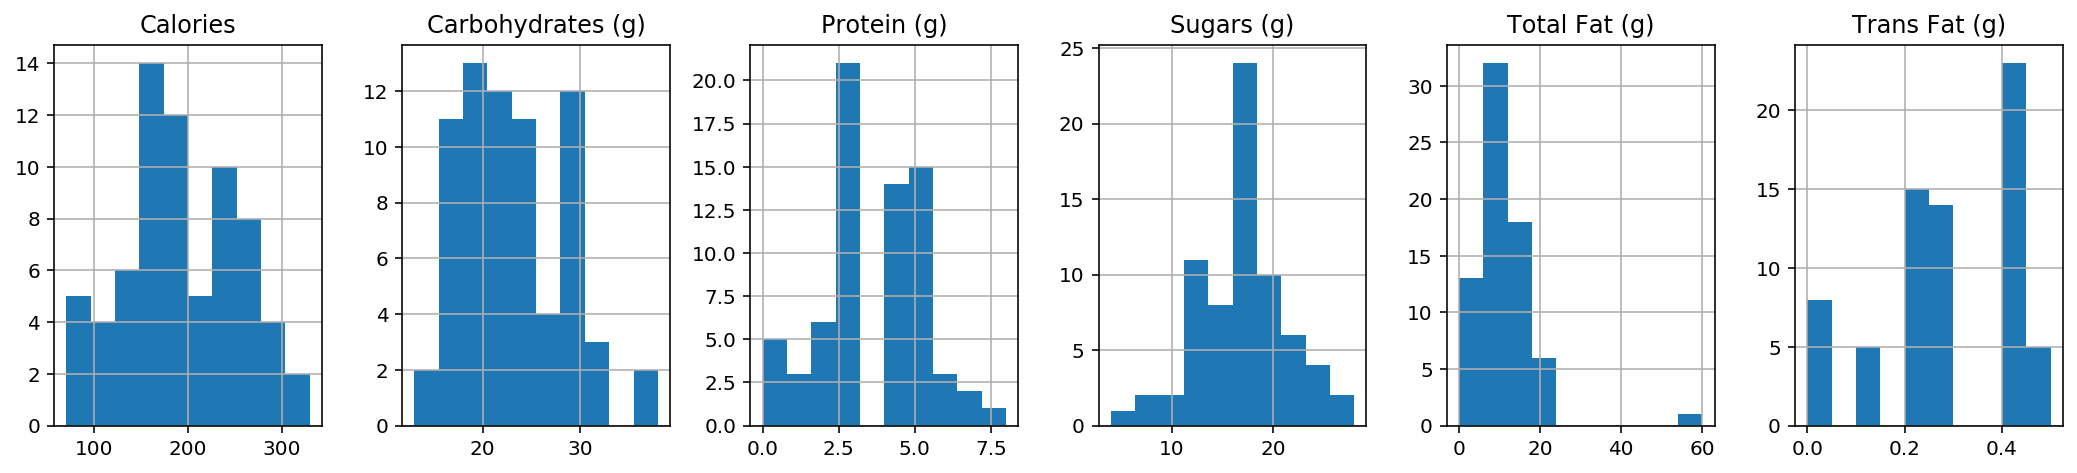

In [14]:
ds[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));

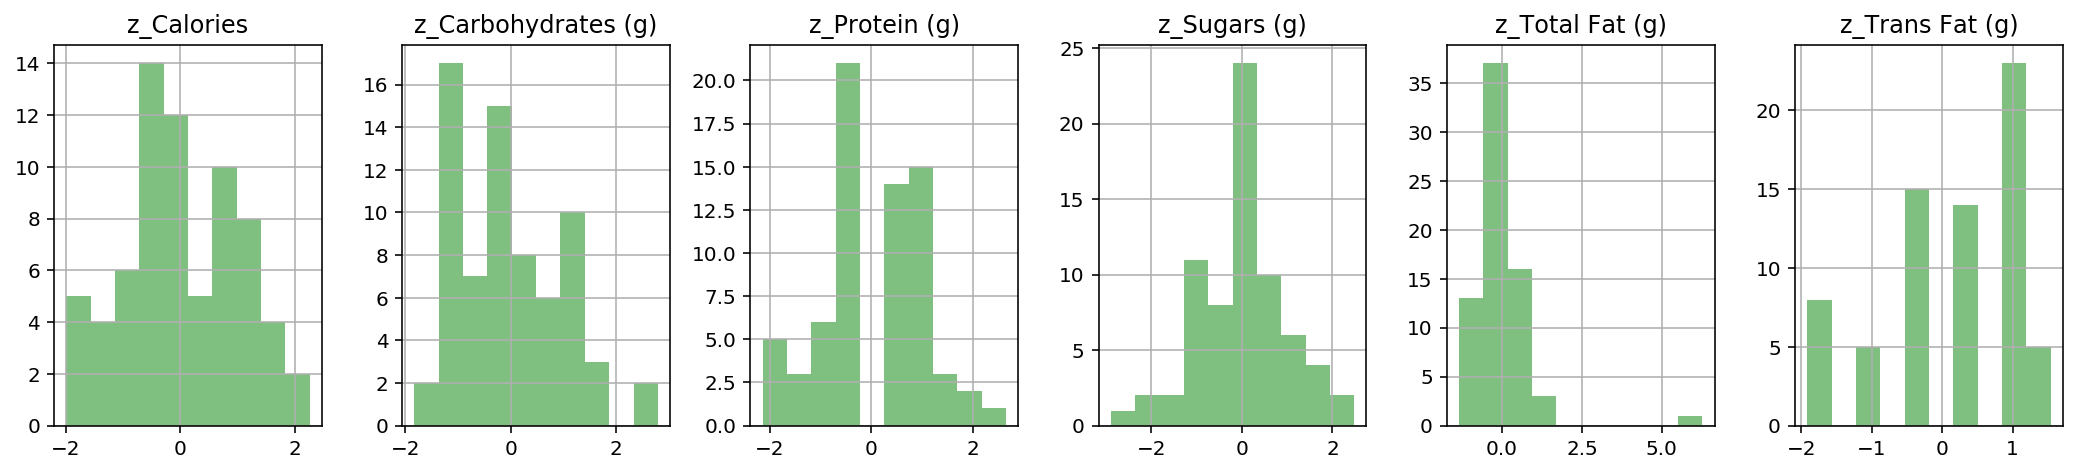

In [15]:
ds[z_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='green', alpha=.5);

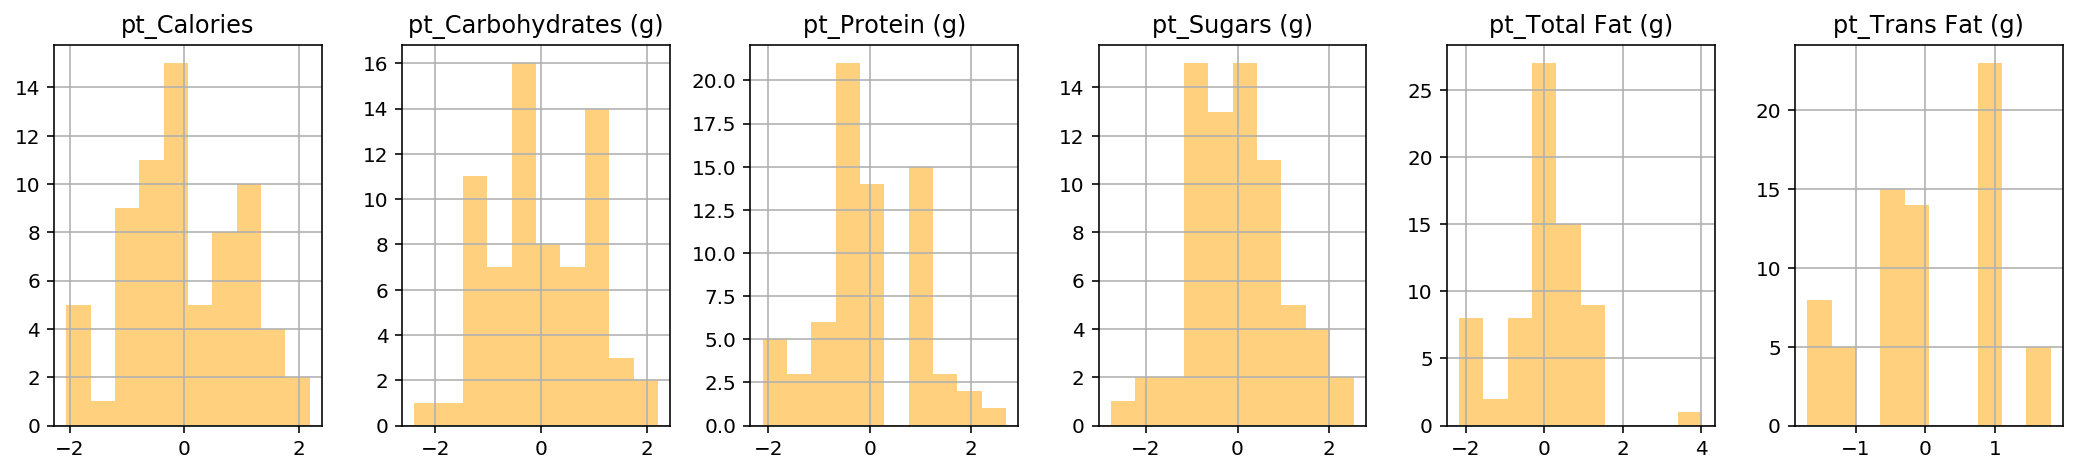

In [16]:
ds[pt_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange', alpha=.5);

In [17]:
X=pd.DataFrame(mat, columns=cols) ## power transformation (preferable)
# X=pd.DataFrame(z, columns=cols) ## z-score
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181


---

## 2. Find optimal number of clusters
- [Elbow method](#Elbow-method)
- [Silhouette analysis](#Silhouette-analysis)

### Elbow method 

In [18]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd

[[2, 212.64279113095122],
 [3, 155.97536067062356],
 [4, 131.65474381217098],
 [5, 109.11262746157172],
 [6, 92.90312214883627],
 [7, 84.06178250517611],
 [8, 72.12117793617531],
 [9, 64.85141314272855]]

In [19]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,212.642791
1,3,155.975361
2,4,131.654744
3,5,109.112627
4,6,92.903122
5,7,84.061783
6,8,72.121178
7,9,64.851413


In [20]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,212.642791,NaN
1,3,155.975361,-26.649119
2,4,131.654744,-15.592602
3,5,109.112627,-17.122145
4,6,92.903122,-14.855756
5,7,84.061783,-9.516730
6,8,72.121178,-14.204558
7,9,64.851413,-10.079931


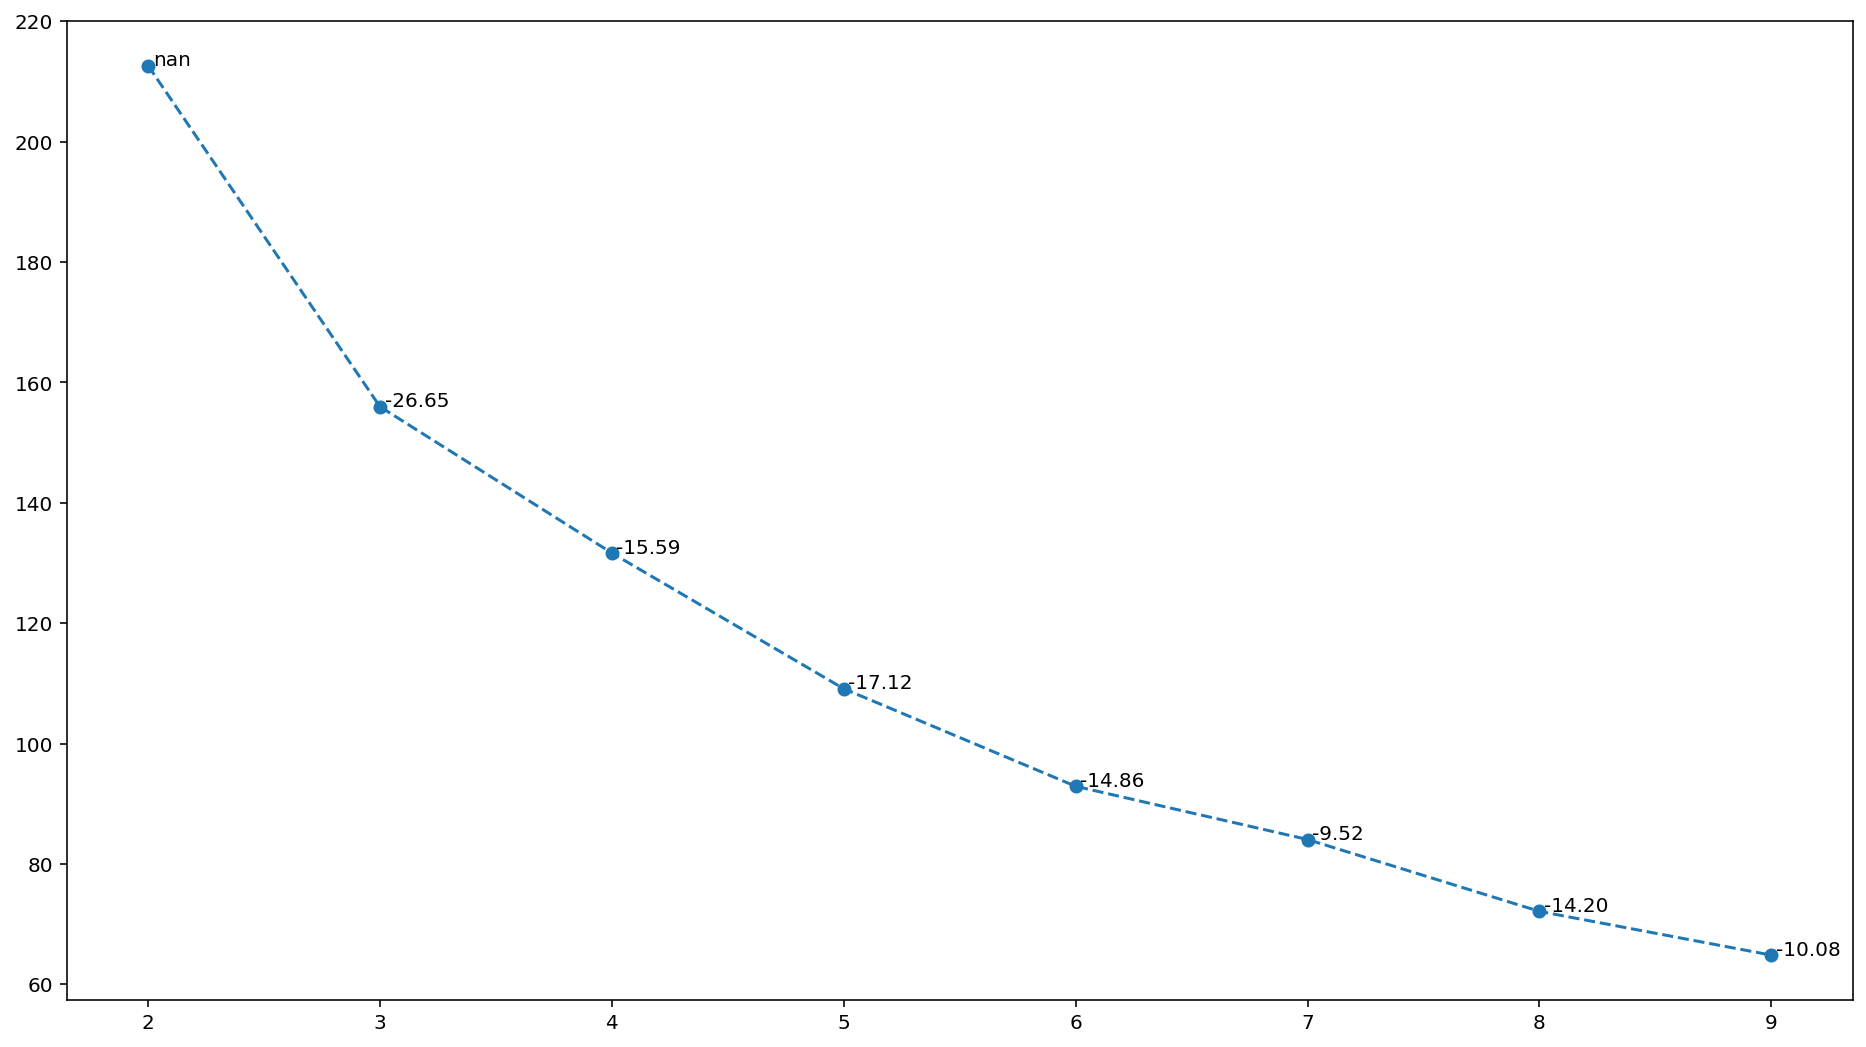

In [21]:
plt.figure(figsize=(16,9))
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

In [22]:
def elbow_plot(X, from_k=2, to_k=5):
    ssd=[]
    for k in range(from_k, to_k + 1):
        m=KMeans(n_clusters=k)
        m.fit(X)
        ssd.append([k, m.inertia_])
    dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
    dd['pct_chg']=dd['ssd'].pct_change() * 100
    plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
    # plt.plot(xy[:, 0], xy[:, 1], '--o')
    for index, row in dd.iterrows():
        plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

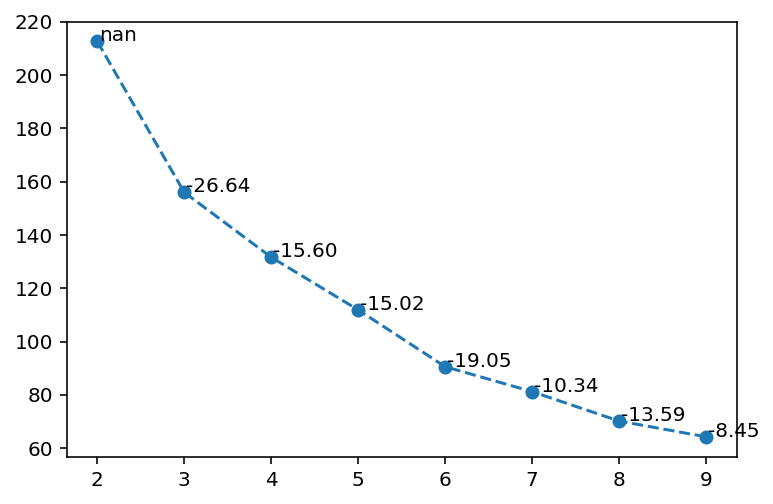

In [23]:
elbow_plot(X, 2, 9)

## fit the model

In [24]:
model = KMeans(n_clusters=3)
model
# X=df[cols]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 1,
       2, 2, 0, 1])

## Silhouette analysis
* sklearn doc: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
* yellowbrick doc: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer

C:\Users\prasert\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
def silhouette_scores(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters=k)
        m.fit(X)
        # The silhouette_score gives the average value for all the samples
        silhouette_avg = silhouette_score(X, m.labels_).round(4)
        sil_scores.append([silhouette_avg, k])
        
#         Compute the silhouette scores for each sample
#         sample_silhouette_values = silhouette_samples(X, m.labels_)
#         print(sample_silhouette_values)
#     return max(sil_scores)[1]
    return sil_scores

In [29]:
ss=silhouette_scores(X, 2, 5)
print(f'scores = {ss}')
print(f'optimal number of clusters = {max(ss)[1]}')

scores = [[0.44, 2], [0.4279, 3], [0.3824, 4], [0.4043, 5]]
optimal number of clusters = 2


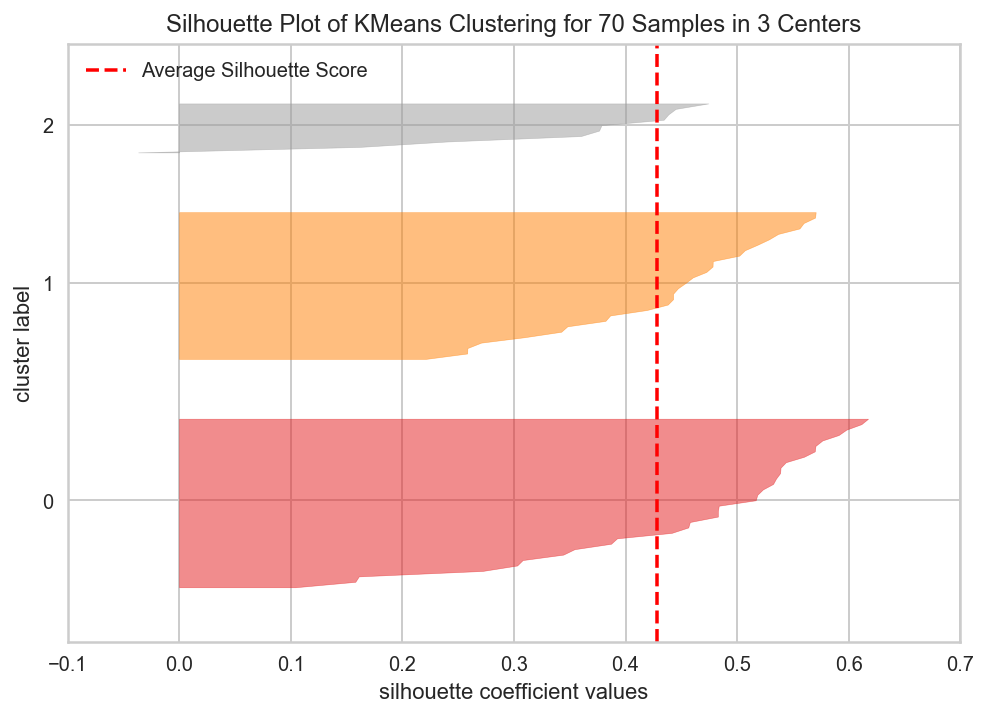

In [30]:
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

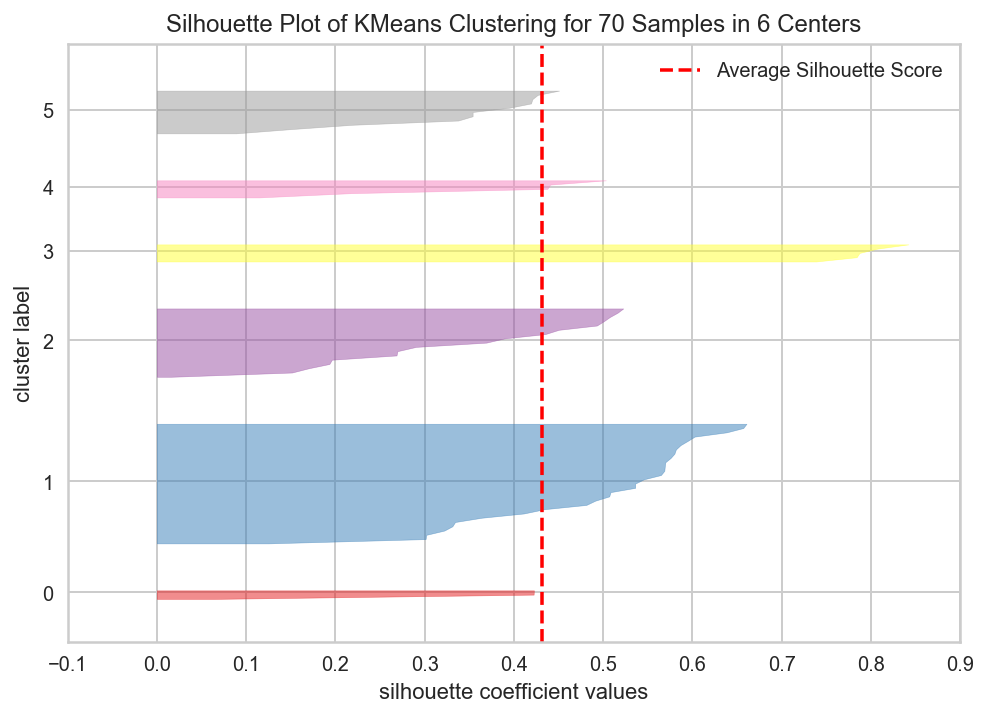

In [31]:
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [32]:
visualizer.silhouette_score_

0.4315513188147964

In [33]:
def silhouette_plot(X, from_k, to_k):
    sil_scores=[]
    for k in range(from_k, to_k + 1):
        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data
#         print(visualizer.silhouette_score_)
#         sil_scores.append([k, visualizer.silhouette_score_])
        sil_scores.append([visualizer.silhouette_score_, k])
    return sil_scores

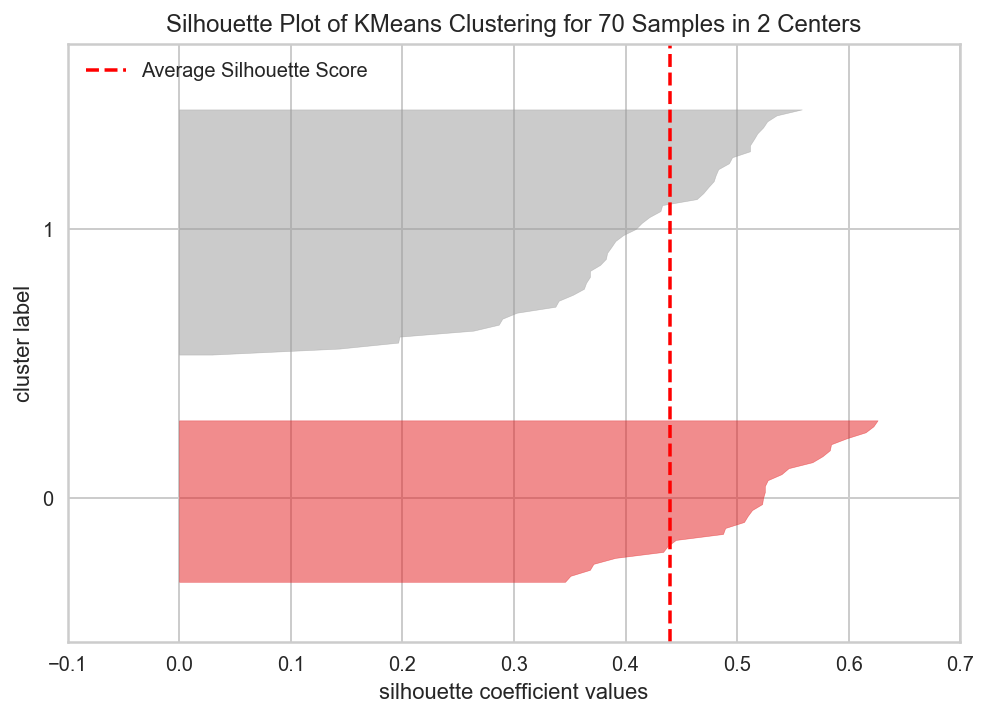

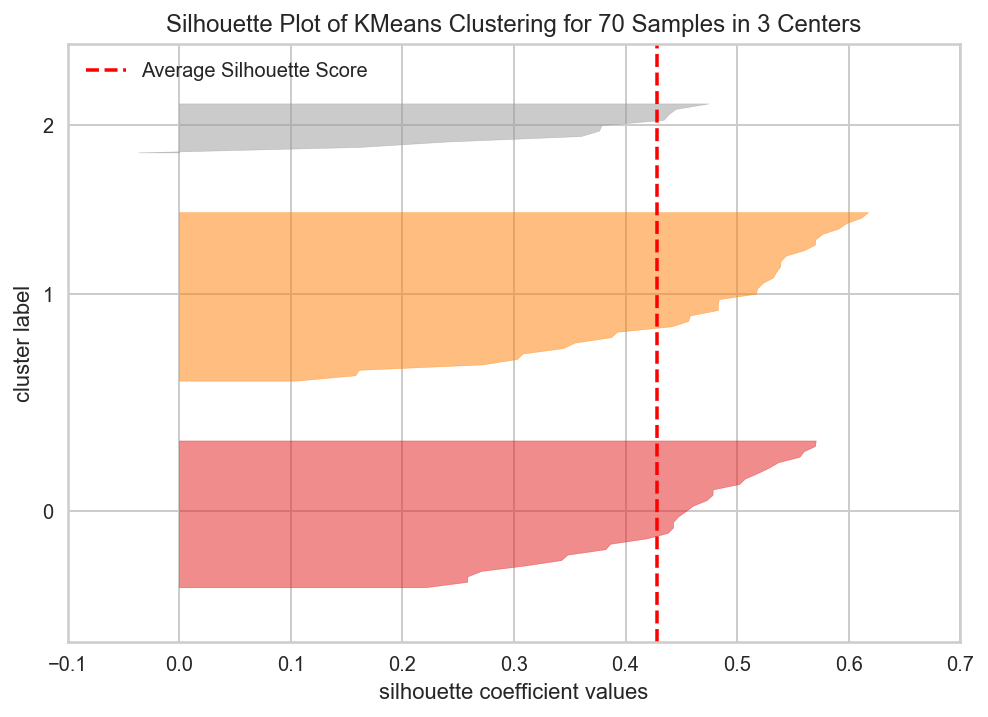

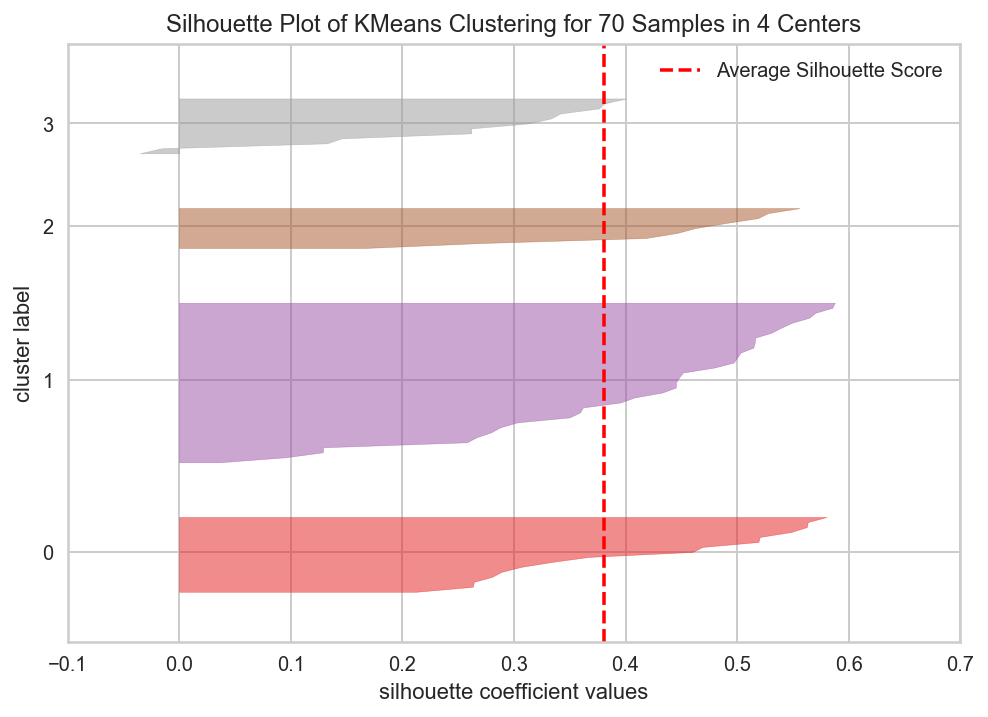

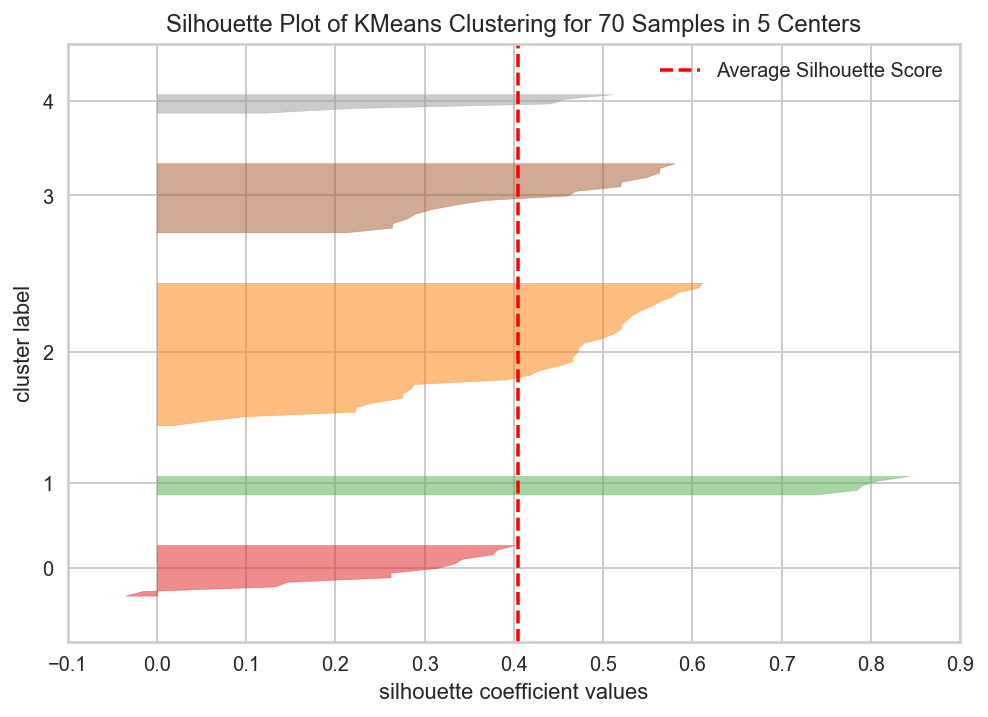

In [34]:
scores=silhouette_plot(X, 2, 5)

In [35]:
print(scores)

[[0.43997265572927813, 2], [0.42789606729873375, 3], [0.380336282442257, 4], [0.4043168593471258, 5]]


In [36]:
max(scores)[1]

2

## sense making about each cluster

In [37]:
ds.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'pt_Calories',
       'pt_Total Fat (g)', 'pt_Trans Fat (g)', 'pt_Carbohydrates (g)',
       'pt_Sugars (g)', 'pt_Protein (g)', 'z_Calories', 'z_Total Fat (g)',
       'z_Trans Fat (g)', 'z_Carbohydrates (g)', 'z_Sugars (g)',
       'z_Protein (g)'],
      dtype='object')

In [38]:
X=ds[['pt_Calories',
       'pt_Total Fat (g)', 'pt_Trans Fat (g)', 'pt_Carbohydrates (g)',
       'pt_Sugars (g)', 'pt_Protein (g)']]
model = KMeans(n_clusters=3)
model


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
model.cluster_centers_.round(4)

array([[ 1.0208,  0.7778,  0.9435,  0.7589,  0.7909,  0.8394],
       [-1.609 , -1.8181, -1.5943, -0.4232, -0.3092, -1.7464],
       [-0.4273, -0.1641, -0.3658, -0.5285, -0.5867, -0.2359]])

In [41]:
model.labels_

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0,
       1, 1, 2, 0])

In [42]:
df['cluster']=model.labels_
df.head(20)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,2
1,Baseball Nut,160,9.0,0.2,19,13,3.0,2
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,2
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,2
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,1
5,Blueberry Cheesecake,150,8.0,0.3,18,14,3.0,2
6,Brownie Sundae(No Sugar Added),120,5.0,0.1,21,4,3.0,2
7,Caramel Praline Cheesecake,170,8.0,0.2,21,17,3.0,2
8,NSA Caramel Turtle Truffle,200,8.0,0.2,38,7,5.0,2
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,0


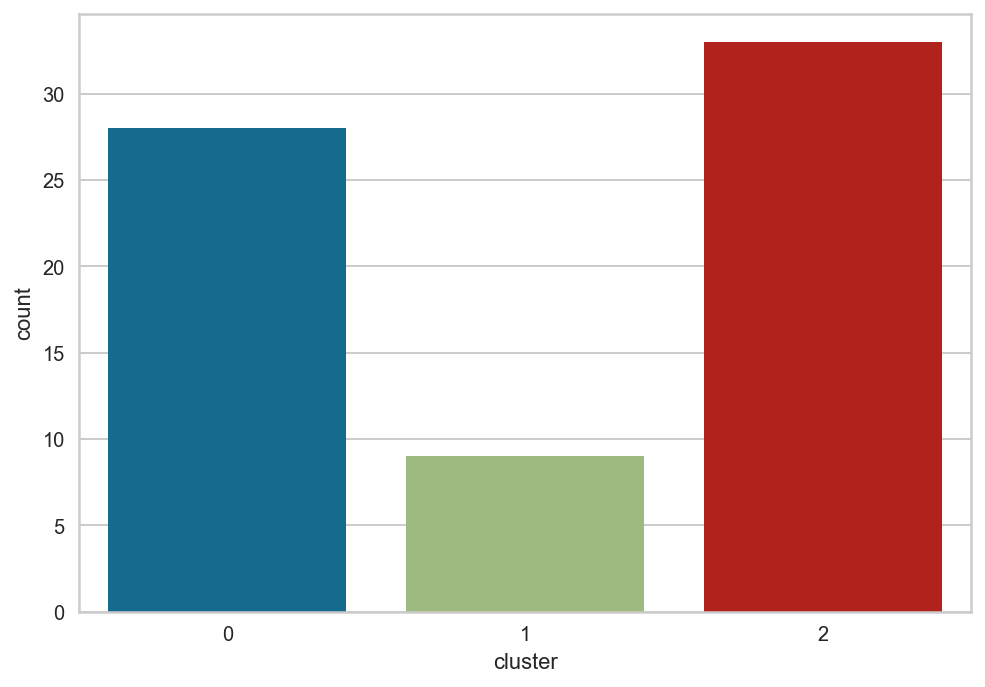

In [43]:
sns.countplot(x='cluster', data=df);

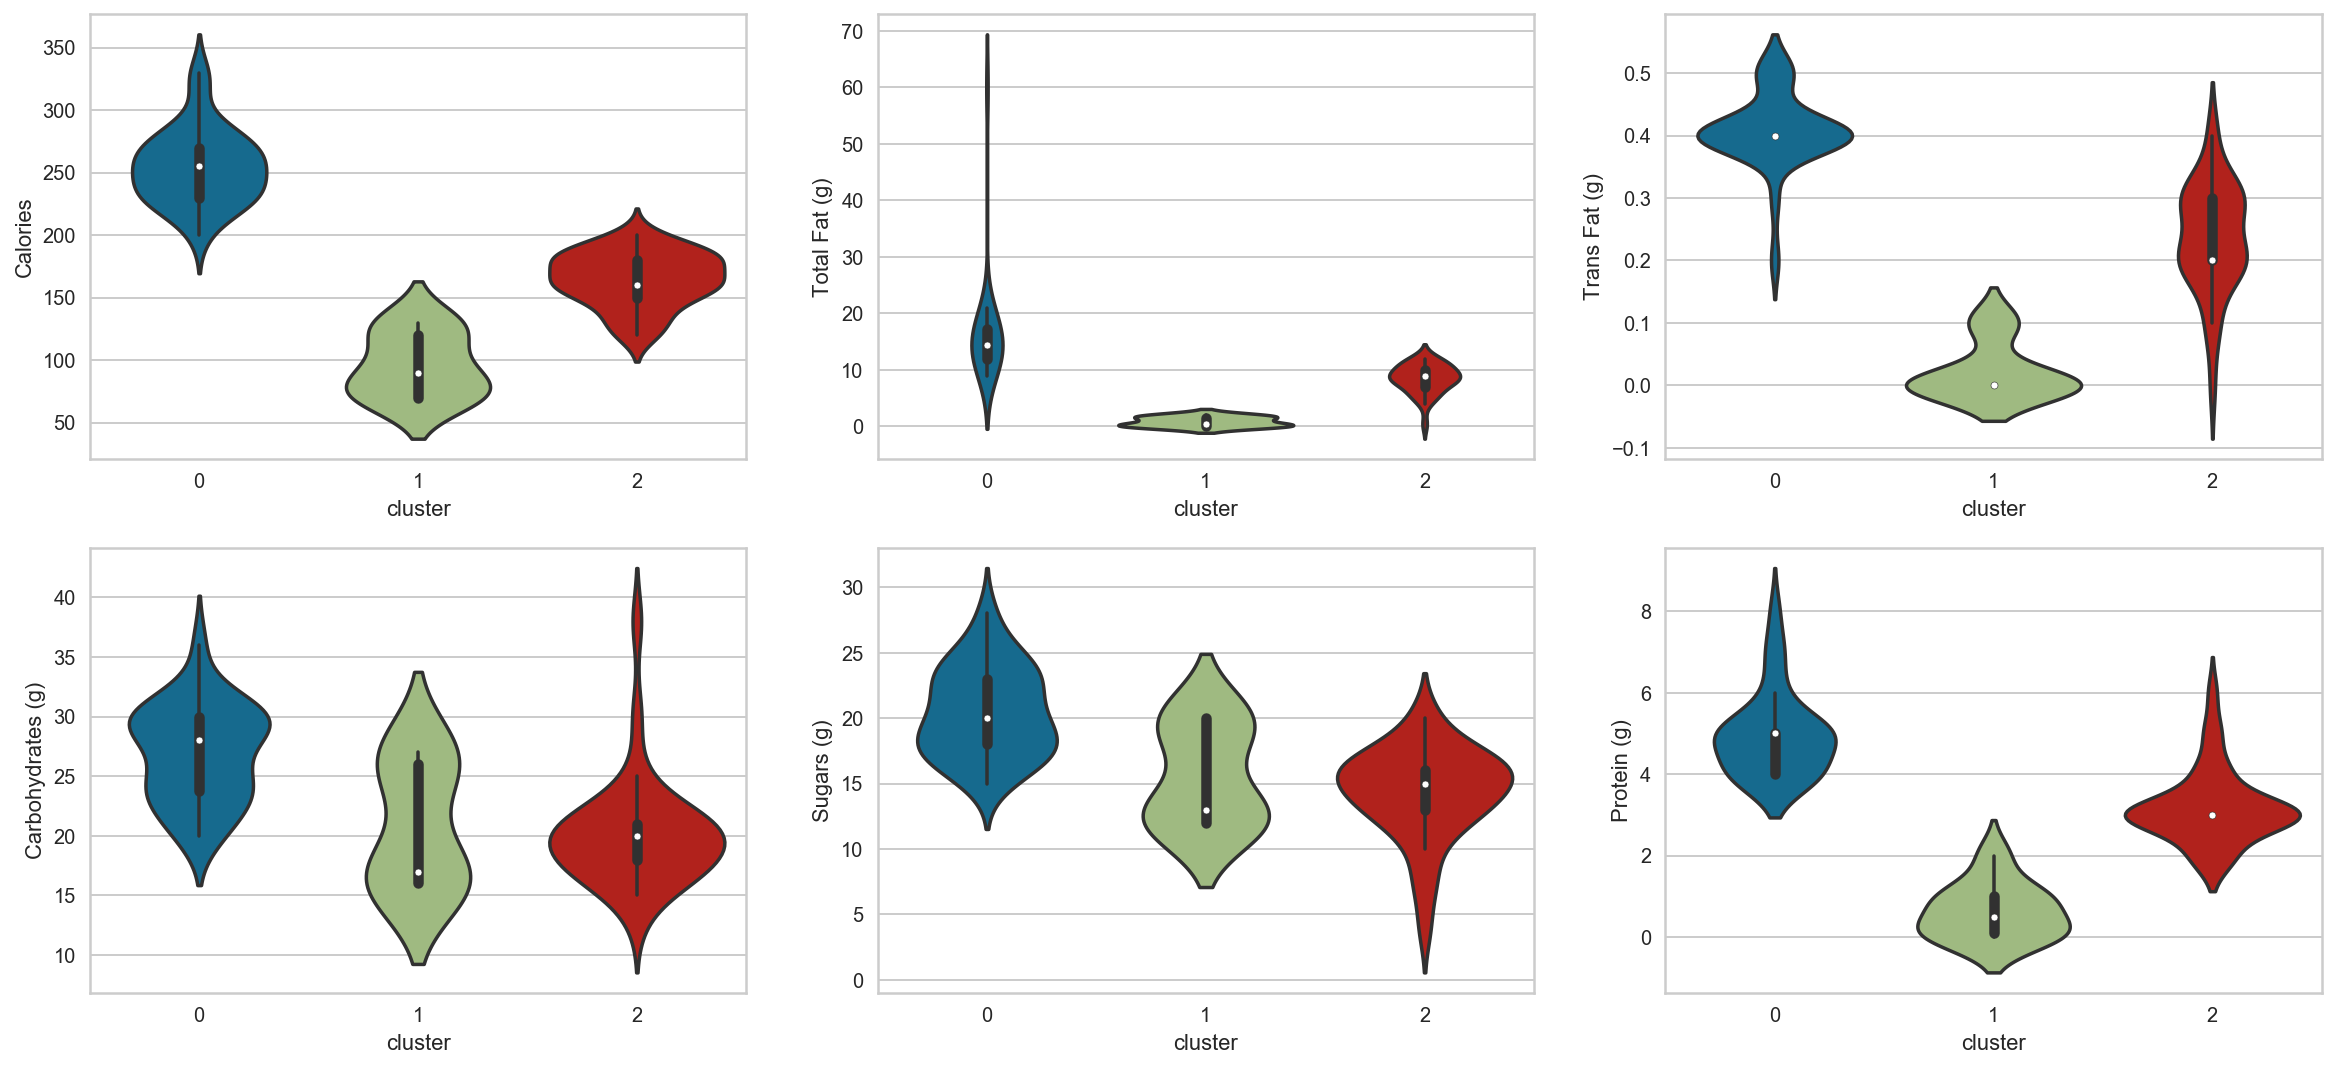

In [44]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df, ax=ax[i])

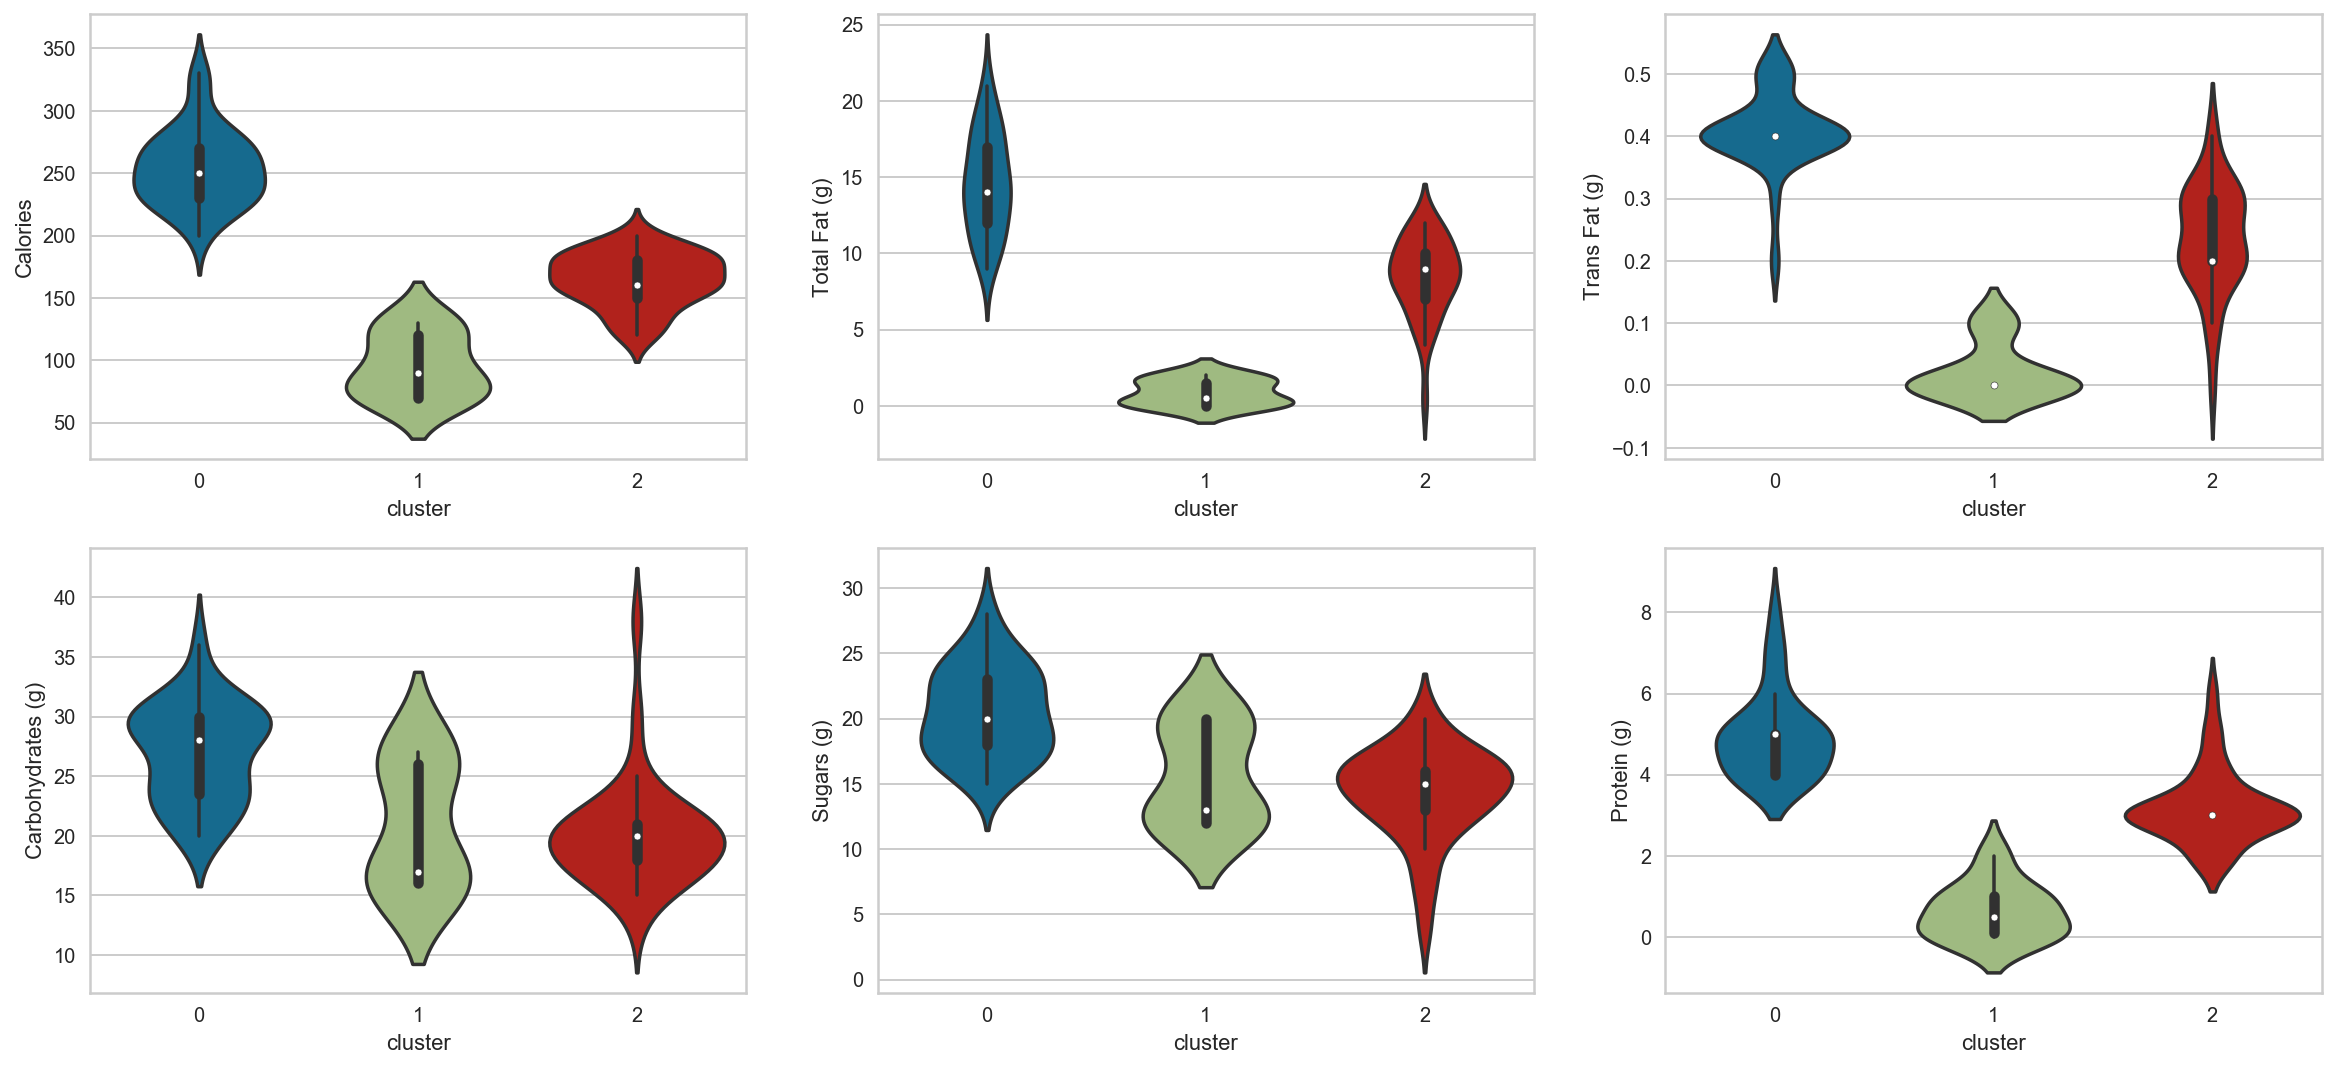

In [45]:
# remove Total Fat(g) outlier
df2=df[df['Total Fat (g)']<50]
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='cluster', y=col, data=df2, ax=ax[i])

### scaled data (either z-score, power transform)

In [46]:
ds.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'pt_Calories',
       'pt_Total Fat (g)', 'pt_Trans Fat (g)', 'pt_Carbohydrates (g)',
       'pt_Sugars (g)', 'pt_Protein (g)', 'z_Calories', 'z_Total Fat (g)',
       'z_Trans Fat (g)', 'z_Carbohydrates (g)', 'z_Sugars (g)',
       'z_Protein (g)'],
      dtype='object')

In [47]:
dx=ds[['pt_Calories',
       'pt_Total Fat (g)', 'pt_Trans Fat (g)', 'pt_Carbohydrates (g)',
       'pt_Sugars (g)', 'pt_Protein (g)']]
dx['cluster']=model.labels_
dx.head()

C:\Users\prasert\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,pt_Calories,pt_Total Fat (g),pt_Trans Fat (g),pt_Carbohydrates (g),pt_Sugars (g),pt_Protein (g),cluster
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,2
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,2
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,2
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,2
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,1


In [48]:
dx.groupby('cluster').median()

,pt_Calories,pt_Total Fat (g),pt_Trans Fat (g),pt_Carbohydrates (g),pt_Sugars (g),pt_Protein (g)
cluster,,,,,,
0,1.029516,0.671798,0.857656,0.980131,0.686477,0.859598
1,-1.701140,-1.935544,-1.700508,-1.166310,-0.883644,-1.826166
2,-0.499816,-0.039724,-0.643961,-0.447402,-0.442092,-0.346462


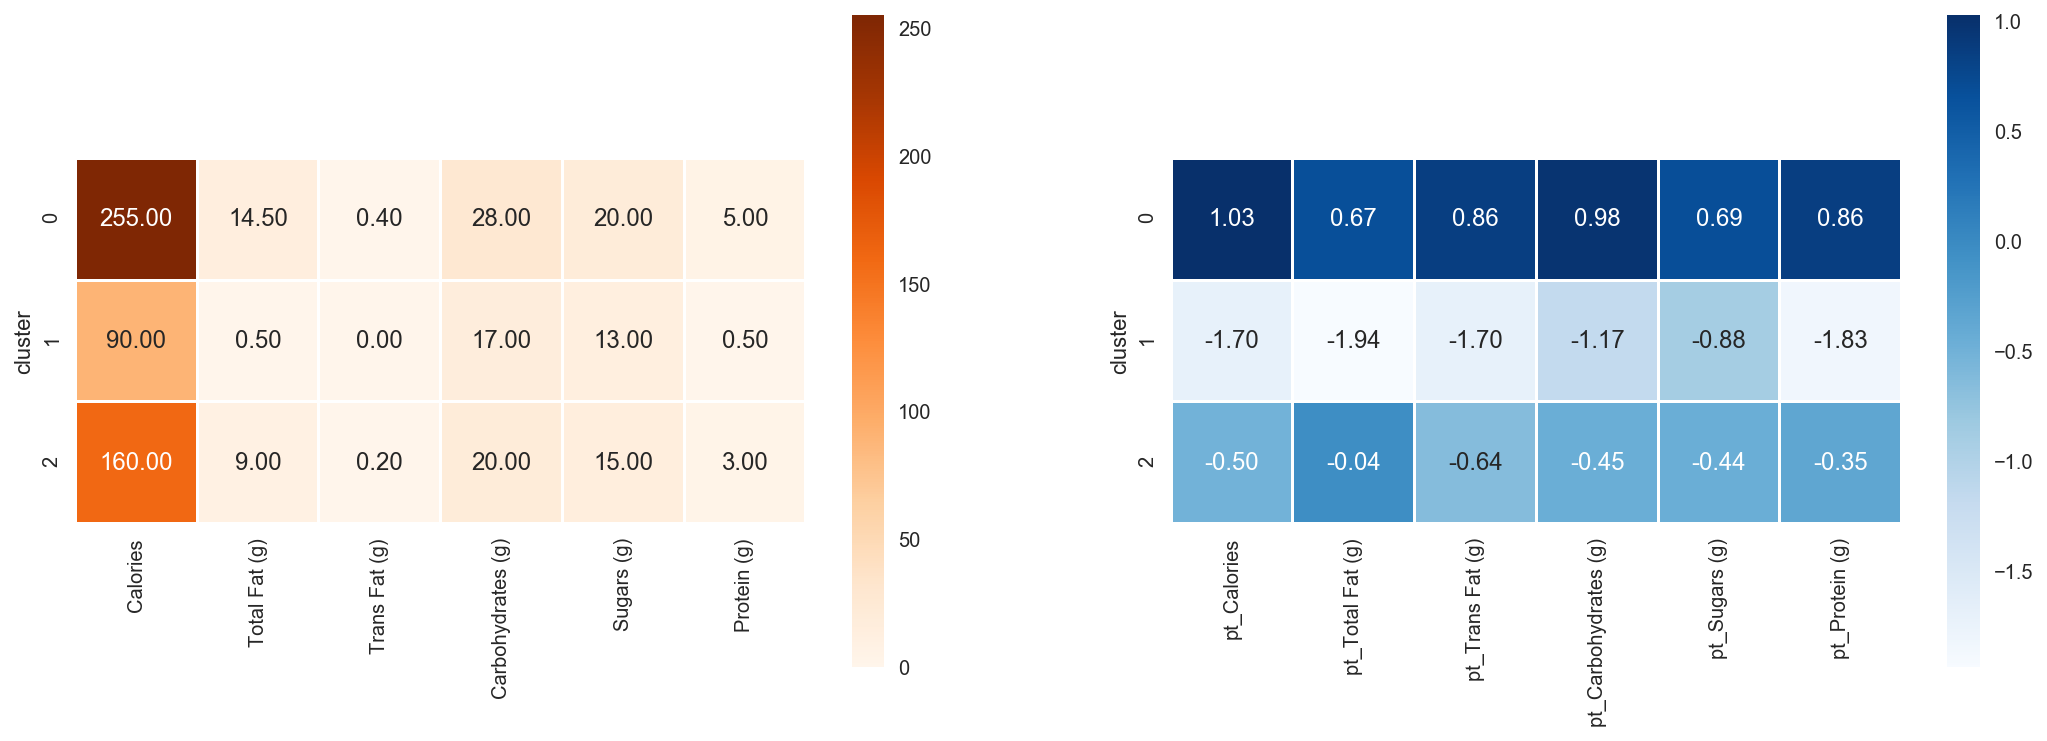

In [49]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster']
fig, ax = plt.subplots(ncols=2, figsize=(18, 6))
ax=ax.ravel()
sns.heatmap(df[cols].groupby('cluster').median(), cmap="Oranges", linewidths=1, 
            square=True, annot=True, fmt='.2f',ax=ax[0]);
sns.heatmap(dx.groupby('cluster').median(), cmap="Blues", linewidths=1, 
            square=True, annot=True, fmt='.2f', ax=ax[1]);

In [50]:
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,2
1,Baseball Nut,160,9.0,0.2,19,13,3.0,2
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,2
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,2
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,1


In [51]:
df.mean()

Calories             191.714286
Total Fat (g)         10.562857
Trans Fat (g)          0.277143
Carbohydrates (g)     22.900000
Sugars (g)            16.914286
Protein (g)            3.567143
cluster                1.071429
dtype: float64

In [52]:
df.groupby('cluster').head(3).sort_values('cluster')

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,0
11,Chocolate,230,13.0,0.4,25,18,5.0,0
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,1
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,1
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,1
0,Bananas Foster,160,8.0,0.2,20,16,2.0,2
1,Baseball Nut,160,9.0,0.2,19,13,3.0,2
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,2


In [53]:
# df.to_csv('BaskinRobbinsCluster.csv', index=False)